In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import datascience 
from datascience import *
from cffi.backend_ctypes import xrange
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
import sys
np.set_printoptions(threshold=sys.maxsize)

from mpl_toolkits.mplot3d import Axes3D


#displays image
%matplotlib inline
import matplotlib.pyplot as plt

(180, 172, 3)


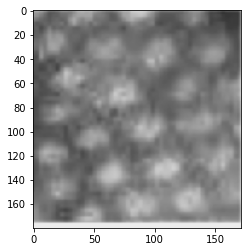

In [60]:
img = cv2.imread('scales1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    
plt.imshow(img)

#width and height of pixels
print(img.shape)

Expearimenting with different threshold functions.

In [44]:
#cv2.threshold(img, threshold value, value given if pixel is more than threshold, style of thresholding)
#would probably want to determine the 
#Source: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html

ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']



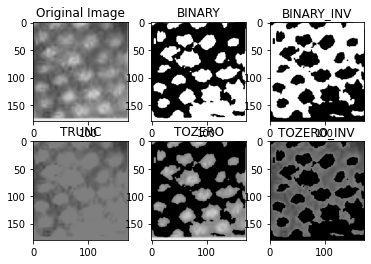

In [45]:
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])

    
plt.show()

Code below is to see the distribution of pixel values in the grayscaled version of the original image.

pixel values,count
0,52008
1,40872


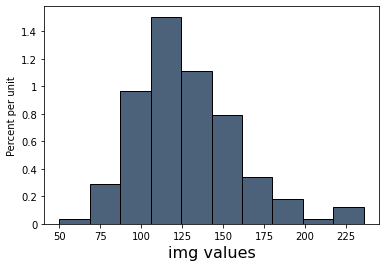

In [122]:
t1px = np.ndarray.flatten(thresh1)
imgpx = np.ndarray.flatten(img)

t1val = Table().with_column("pixel values", t1px)
imgval = Table().with_column("img values", imgpx)

ihist = imgval.hist("img values")
i

t1val.group("pixel values")


#make hist of each pixels distance to blackness


172
180


Text(0.5, 1.0, 'pixel eucliden distance density')

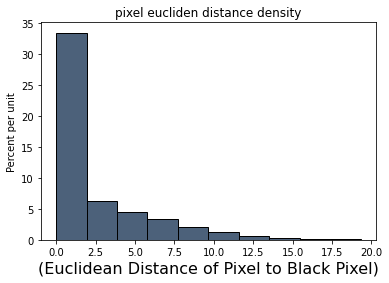

In [153]:
#because it is overlapping: considering watershed teqniques.
#there are many ways to calculate the distance of a pixel to the closest background pixel. 
#One such way is the Euclidien distance formula. Finding local maxima: the poiints where the euclidien distance is greatest 
#Is a good way to be able to idenitify the spots. 
#Source: https://www.pyimagesearch.com/2015/11/02/watershed-opencv/#:~:text=The%20watershed%20algorithm%20is%20a,coins%20in%20the%20figure%20above.

# compute the exact Euclidean distance from every binary
# pixel to the nearest zero pixel, then find peaks in this
# distance map

#ndimage is a module from scipy that allows for image processing. Finds the distance from each pixel to background (0) according to material from thresh1
#D = ndimage.distance_transform_edt(thresh1)

#how to determine the min_distance??
#https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_peak_local_max.html explains how peak_local_max works
#localMax = peak_local_max(D, indices=False, min_distance=0,labels=thresh1)

        
#markers = ndimage.label(localMax)[0]
#labels = watershed(-D, markers, mask=thresh1)
#print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))

#the width of the matrix is 172 pixels represented by 172 rows
print(len(img[0])) #img width
print(len(img)) #img height 
D = D = np.ndarray.flatten(ndimage.distance_transform_edt(thresh1))
disttab = Table().with_column("(Euclidean Distance of Pixel to Black Pixel)", D)
disttab.hist("(Euclidean Distance of Pixel to Black Pixel)")
plt.title("pixel eucliden distance density")


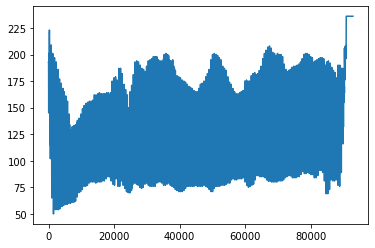

In [159]:
plt.plot(np.ndarray.flatten(img))

In [180]:
#generate a 3s plot?

AttributeError: module 'scipy.misc' has no attribute 'lena'